**CSV 파일 불러오기**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/JunYoungPark/ai_study/data_files/abalone.csv")
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**데이터 전처리**

In [3]:
# drop [id] column
df = df.drop(columns=["id"])
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [4]:
# 결측값 및 중복값 확인 
print(df.isna().sum())
print("\n")
print(df.duplicated().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


0


In [5]:
# [Sex] column encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

**데이터 시각화**

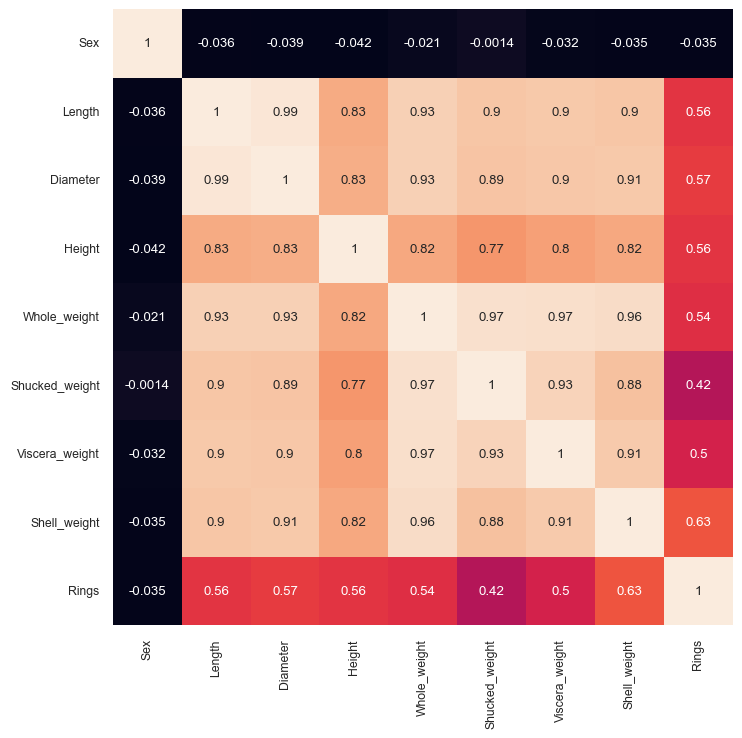

In [6]:
# 상관 관계 행렬
# 0.3 이상이면 상관관계가 있고, 0.7 이상이면 매우 높음으로 해석 

df_corr = df.corr()

# heatmap
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

**학습 준비**

In [7]:
# X, y 나누기
X = df.drop(columns=['Rings'])
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [8]:
y = df["Rings"]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [9]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
# train_set, test_set 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 8) (3341,)
(836, 8) (836,)


**학습**

LinearRegression MSE: 5.104186010193345


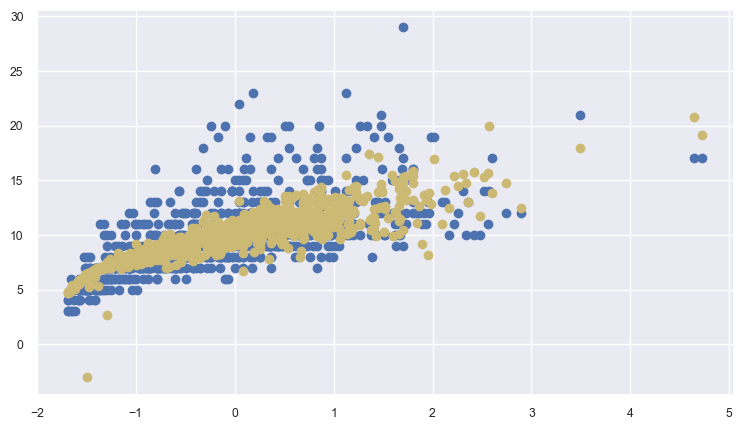

In [19]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print("LinearRegression MSE:", mean_squared_error(ly_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test[:, -1], y_test, label="y_test")
plt.scatter(X_test[:, -1], ly_preds, c="y", label='ly_preds')
plt.show()

DecisionTreeRegressor MSE: 8.974880382775119


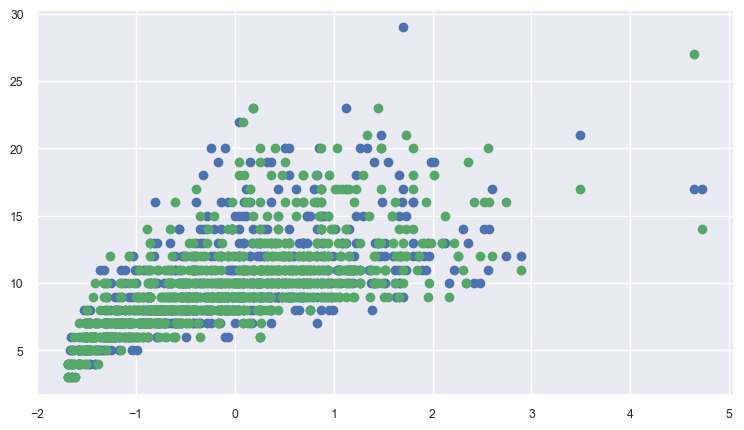

In [22]:
# DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
dy_preds = model.predict(X_test)

print("DecisionTreeRegressor MSE:", mean_squared_error(dy_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test[:, -1], y_test, label="y_test")
plt.scatter(X_test[:, -1], dy_preds, c="g", label='dy_preds')
plt.show()

RandomForestRegressor MSE: 4.708212559808612


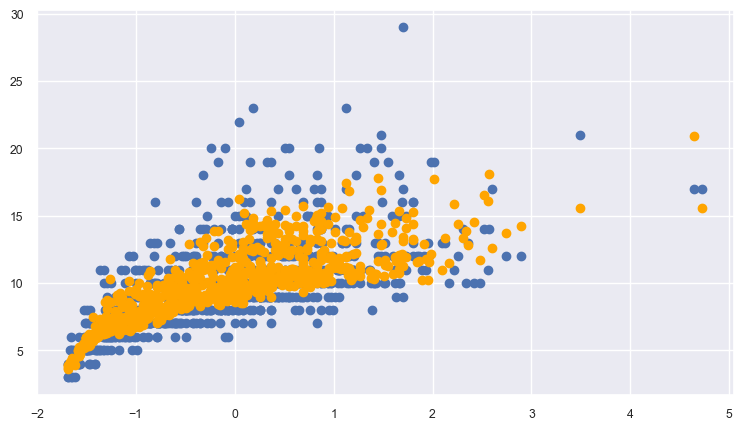

In [26]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
rf_preds = model.predict(X_test)

print("RandomForestRegressor MSE:", mean_squared_error(rf_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test[:, -1], y_test, label="y_test")
plt.scatter(X_test[:, -1], rf_preds, c="orange", label='rf_preds')
plt.show()

SVR MSE: 4.651754066985646


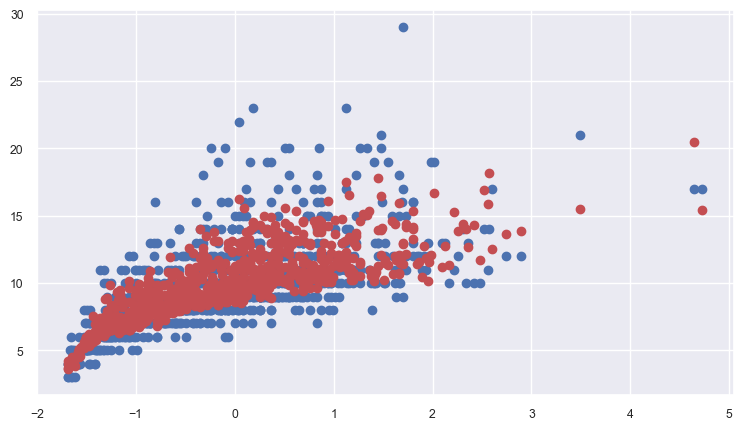

In [28]:
# SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
svr_preds = model.predict(X_test)

print("SVR MSE:", mean_squared_error(svr_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test[:, -1], y_test, label="y_test")
plt.scatter(X_test[:, -1], svr_preds, c="r", label='svr_preds')
plt.show()